## Image classification Prac 1

### Spring School of Mathematics of Data Science (pre-cource)

***Dr. Emmanuel Dufourq*** www.emmanueldufourq.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2019***

Credits:

(extended from https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)

***NOTE***

Be sure to use hardware acceleration to use the GPU. Click on `Runtime`, change `runtime type`, and select `GPU` for the *hardware accelerator* option.

## Imports first

In [0]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pandas as pd
%matplotlib inline

## Load the dataset

In [0]:
# load data
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## View the shape

In [0]:
print('Training data shape : ', X_train.shape, Y_train.shape)

Training data shape :  (60000, 28, 28) (60000,)


In [0]:
print('Testing data shape : ', X_test.shape, Y_test.shape)

Testing data shape :  (10000, 28, 28) (10000,)


## Find the unique numbers from the train labels

In [0]:
classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


## Plot some of the data

Text(0.5, 1.0, 'Ground Truth : 1')

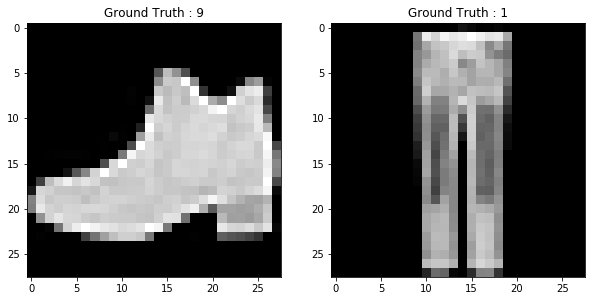

In [0]:
data_point = 15

plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[data_point,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[data_point]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[data_point,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[data_point]))

## Reshape needed

Keras wants to know the depth of an image. 

For CNNS, Keras wants the format of the data as follows: [batches, width, height, depth]. 

In this case the colour channel/depth of the images is 1. Currently the shape is:

In [0]:
X_train.shape

(60000, 28, 28)

But this doesn't have a depth value. So we can reshape it

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

## View the shape

In [0]:
print('Training data shape : ', X_train.shape, Y_train.shape)

Training data shape :  (60000, 28, 28, 1) (60000,)


In [0]:
print('Testing data shape : ', X_test.shape, Y_test.shape)

Testing data shape :  (10000, 28, 28, 1) (10000,)


## Take a look at a single image

In [0]:
X_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

## What is the min/max for this image?

In [0]:
np.max(X_train[0])

1.0

In [0]:
np.min(X_train[0])

0.0

## Normalise

We need to normalise the data since the values range from 0 to 255. Training NNs on data ranging between [0,1] can be easier.

Need to normalise all features, including training, validation and testing. We also need to apply the same normalisation to any new data.

In [0]:
X_train = X_train / 255
X_test = X_test / 255

## Take a look at a single image (after normalisation)

In [0]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## What is the min/max for this image after normalisation?

In [0]:
np.max(X_train[0])

1.0

In [0]:
np.min(X_train[0])

0.0

## One hot encoding

## Before

In [0]:
Y_test[0]

9

## Convert from categorical labels to one-hot encoded vectors

In this case there are 10 classes so we can tell the function to convert into a vector of length 10

In [0]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
num_classes = 10

## After

In [0]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Create a CNN model

In [0]:
def baseline_model():
    # create model
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
    
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    
    model.add(tf.keras.layers.Dropout(0.5))
    
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    return model

In [0]:
model = baseline_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Determine the number of trainable parameters

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               200832    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

## Begin training

In [0]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=200, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.6672 - acc: 0.7624 - val_loss: 0.4170 - val_acc: 0.8455
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4138 - acc: 0.8533 - val_loss: 0.3522 - val_acc: 0.8729
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3613 - acc: 0.8708 - val_loss: 0.3215 - val_acc: 0.8837
Epoch 4/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3283 - acc: 0.8828 - val_loss: 0.3041 - val_acc: 0.8876
Epoch 5/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3094 - acc: 0.8893 - val_loss: 0.2910 - val_acc: 0.8950


## Predict on one example

In [0]:
model.predict_classes(np.expand_dims(X_test[0], axis=0))

array([9])

## Predicting, but obtaining the probabilities

In [0]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[1.3581870e-06, 6.7281570e-07, 6.8541738e-07, 1.7434925e-08,
        3.1098918e-07, 1.2776222e-03, 7.1497811e-07, 6.0697873e-03,
        5.8562990e-05, 9.9259031e-01]], dtype=float32)

## Predict on all the test data

In [0]:
predictions = model.predict_classes(X_test)

In [0]:
predictions[0:15]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4])

## Compute the accuracy

Before applying the `accuracy_score` function we need to conver the data into single class integers. In it's current form, the Y_test values aren't suitable. To address this, we can use the `np.argmax` function.

In [0]:
Y_test[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [0]:
correct_values = np.argmax(Y_test,axis=1)

In [0]:
correct_values[0:5]

array([9, 2, 1, 1, 6])

In [0]:
accuracy_score(predictions,correct_values)*100

89.5

## Confusion matrix

In [0]:
confusion_matrix(predictions,correct_values)

array([[852,   1,  15,  21,   1,   0, 120,   0,   2,   0],
       [  0, 965,   1,   6,   1,   0,   1,   0,   1,   0],
       [ 20,   0, 875,  12, 112,   0,  79,   0,   3,   0],
       [ 28,  24,   6, 908,  37,   0,  24,   0,   3,   0],
       [  4,   3,  49,  19, 783,   0,  71,   0,   2,   0],
       [  1,   0,   0,   0,   0, 975,   0,   8,   2,   5],
       [ 88,   4,  54,  30,  65,   0, 693,   0,   5,   1],
       [  0,   0,   0,   0,   0,  20,   0, 973,   4,  46],
       [  7,   3,   0,   4,   1,   0,  12,   1, 978,   0],
       [  0,   0,   0,   0,   0,   5,   0,  18,   0, 948]])